## Exercise 1 - Scottish lakes

In [246]:
# Downloading the table directly from the source
lakes_url <- "https://en.wikipedia.org/wiki/List_of_lochs_of_Scotland"
library(httr)
library(XML)
r <- GET(lakes_url)
doc <- readHTMLTable(doc = content(r,"text"))

# The table is the very first element in the doc list
scottish.lakes <- as.data.frame(doc[[1]],stringsAsFactors = FALSE)

scottish.lakes
# This procedure retrieved the table names as a row. Extracting, removing and renaming.
headers <- t(scottish.lakes[1,])
scottish.lakes <- scottish.lakes[-1,]
names(scottish.lakes) <- headers

# There are some reference brackets.
clean <- function(x){
    tmp <- as.character(x)
    last <- gregexpr("[^0-9A-Za-z().///' ]", tmp)[[1]][1]
    ntmp <- substring(tmp,1,last-1)
    return(ntmp)
}

gooddata <- lapply(scottish.lakes[,6], clean)
goodname <- clean(colnames(scottish.lakes)[6])
colnames(scottish.lakes)[6] <- goodname
scottish.lakes[goodname] <- as.numeric(gooddata)

# Casting numeric values as such
for (i in 2:5){
    data <- scottish.lakes[i]
    scottish.lakes[i] <- as.numeric(t(data))
}


scottish.lakes

V1,V2,V3,V4,V5,V6
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
Loch,Volume(km³),Area(km²),Length(km),Max. depth(m),Mean depth(m)[6]
Loch Ness,7.45,56,39,230,132[4]
Loch Lomond,2.6,71,36,190,37[7]
Loch Morar,2.3,27,18.8,310,87[8]
Loch Tay,1.6,26.4,23,150,60.6[9]
Loch Awe,1.2,39,41,94,32[10]
Loch Maree,1.09,28.6,20,114,38[5]
Loch Ericht,1.08,18.6,23,156,57.6[9]
Loch Lochy,1.07,16,16,162,70[11]


,Loch,Volume(km³),Area(km²),Length(km),Max. depth(m),Mean depth(m)
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,Loch Ness,7.45,56.0,39.0,230,132.0
3,Loch Lomond,2.60,71.0,36.0,190,37.0
4,Loch Morar,2.30,27.0,18.8,310,87.0
5,Loch Tay,1.60,26.4,23.0,150,60.6
6,Loch Awe,1.20,39.0,41.0,94,32.0
7,Loch Maree,1.09,28.6,20.0,114,38.0
8,Loch Ericht,1.08,18.6,23.0,156,57.6
9,Loch Lochy,1.07,16.0,16.0,162,70.0
10,Loch Rannoch,0.97,19.0,15.7,134,51.0


## Exercise 2 - Crude oil production

In [1]:
# Deleted the first row, but you should be able to read without recurring to such lesser being strategies
oil <- as.data.frame(read.csv('crude-oil-prices.csv'))

In [2]:
library(ggplot2)

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar



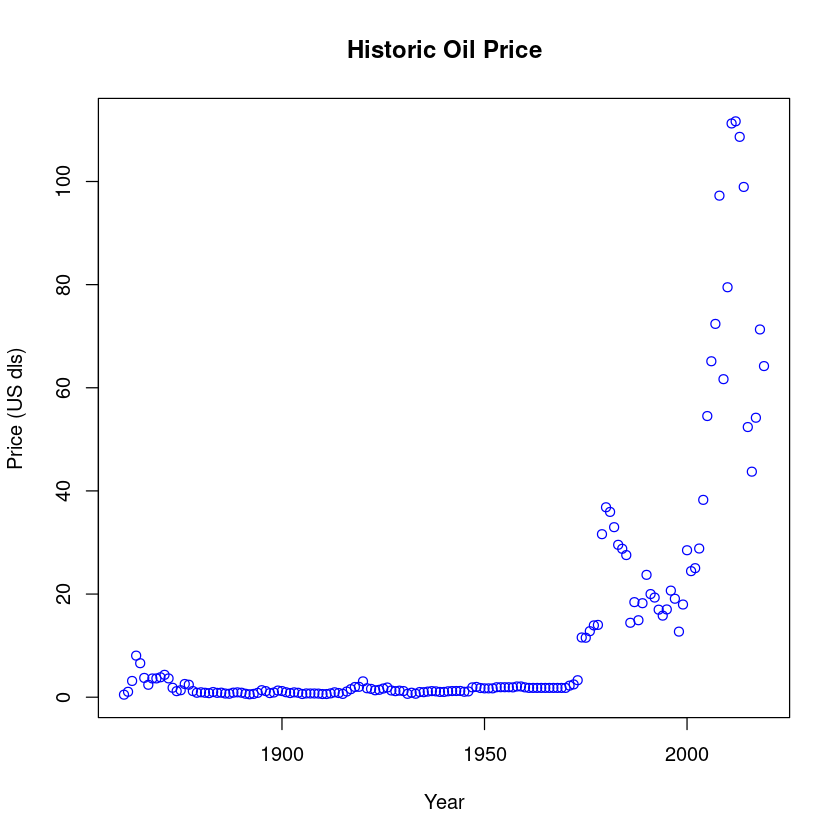

In [26]:
plot(oil[,3], oil[,4], main = 'Historic Oil Price', xlab = 'Year', ylab = 'Price (US dls)', col = 'blue')

In [4]:
library(ramify)


Attaching package: ‘ramify’


The following object is masked from ‘package:graphics’:

    clip




In [5]:
h_ins <- which.max(oil[,4])
when <- oil[h_ins,3]
h_price <- oil[h_ins,4]

In [6]:
f_derivative <- function(x){
    d <- x[2:length(x)] - x[1:length(x)-1]
    return(d)
}

In [7]:
d <- f_derivative(oil[,4])

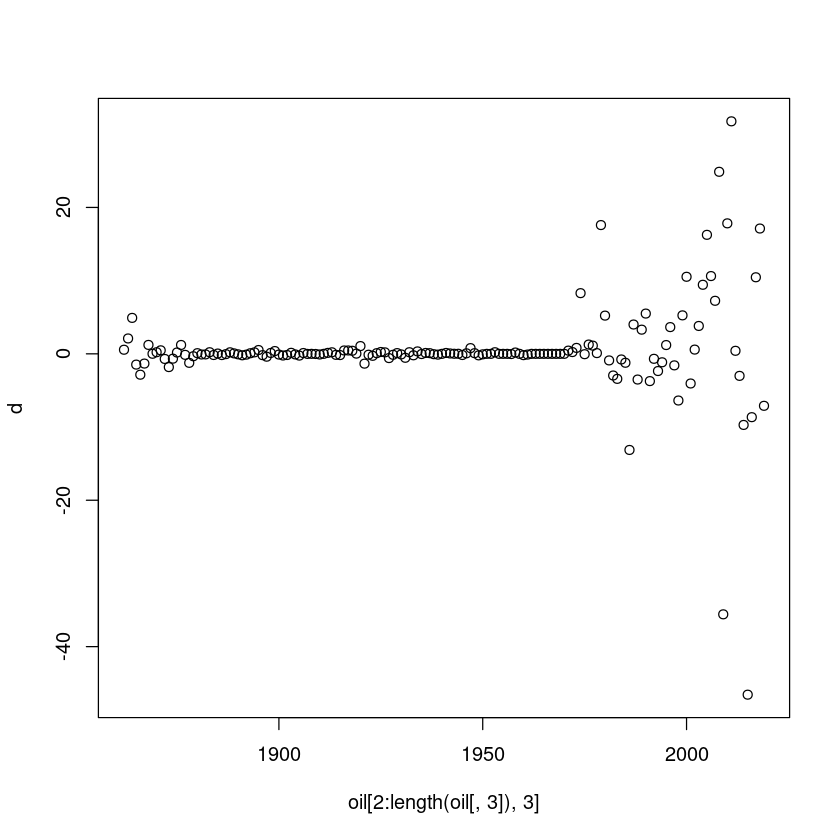

In [8]:
plot(oil[2:length(oil[,3]),3], d)